In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

pd.set_option('display.max_columns', None)

In [2]:
def set_date_range(df, df_name):
    df['date'] = pd.to_datetime(df['date'])
    cols = ['date', 'new_cases']
    if df_name != 'covid':
        df[df_name + '_close'] = round(df['close'], 2)
        cols = ['date', df_name + '_close']
    return df[(df['date'] >= '2020-03-02') & (df['date'] <= '2022-04-01')].sort_values('date')[cols]

In [3]:
covid_df = set_date_range(pd.read_csv('../data/us_covid19_cases.csv'), 'covid')
az_df = set_date_range(pd.read_csv('../data/astra-zeneca.csv'), 'astra_zeneca')
bnt_df = set_date_range(pd.read_csv('../data/biontech.csv'), 'biontech')
jnj_df = set_date_range(pd.read_csv('../data/jnj.csv'), 'jnj')
moderna_df = set_date_range(pd.read_csv('../data/moderna.csv'), 'moderna')
novavax_df = set_date_range(pd.read_csv('../data/novavax.csv'), 'novavax')
pfizer_df = set_date_range(pd.read_csv('../data/pfizer.csv'), 'pfizer')

In [4]:
covid_df.head()

,date,new_cases
40,2020-03-02,23.0
41,2020-03-03,19.0
42,2020-03-04,33.0
43,2020-03-05,77.0
44,2020-03-06,53.0


In [5]:
pfizer_df.head()

,date,pfizer_close
532,2020-03-02,33.09
531,2020-03-03,32.54
530,2020-03-04,34.54
529,2020-03-05,33.64
528,2020-03-06,33.23


In [6]:
dataframes = [covid_df, az_df, bnt_df, jnj_df, moderna_df, novavax_df, pfizer_df]
all_df = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='outer'), dataframes).dropna().drop(columns=['date'])
all_df.head()

,new_cases,astra_zeneca_close,biontech_close,jnj_close,moderna_close,novavax_close,pfizer_close
0,23.0,45.87,36.60,140.02,29.88,12.02,33.09
1,19.0,45.52,38.48,135.59,27.91,10.78,32.54
2,33.0,48.60,39.19,143.48,27.49,11.32,34.54
3,77.0,48.38,37.12,142.01,28.01,12.87,33.64
4,53.0,47.52,38.09,142.03,29.61,12.48,33.23


In [7]:
mean_normalized_df = (all_df - all_df.mean()) / all_df.std()
min_max_normalized_df = (all_df - all_df.min()) / (all_df.max() - all_df.min())
normalized_df = min_max_normalized_df
normalized_df.sample(5)

,new_cases,astra_zeneca_close,biontech_close,jnj_close,moderna_close,novavax_close,pfizer_close
522,0.182009,0.635868,0.860944,0.905332,0.847248,0.584563,0.527177
414,0.045106,0.493692,0.304839,0.808473,0.292506,0.642898,0.350672
248,0.092539,0.592226,0.151548,0.418115,0.108340,0.275382,0.219170
409,0.053446,0.444596,0.267913,0.719503,0.299177,0.623538,0.308884
681,0.613202,0.702693,0.459348,0.856830,0.435240,0.393777,0.865576


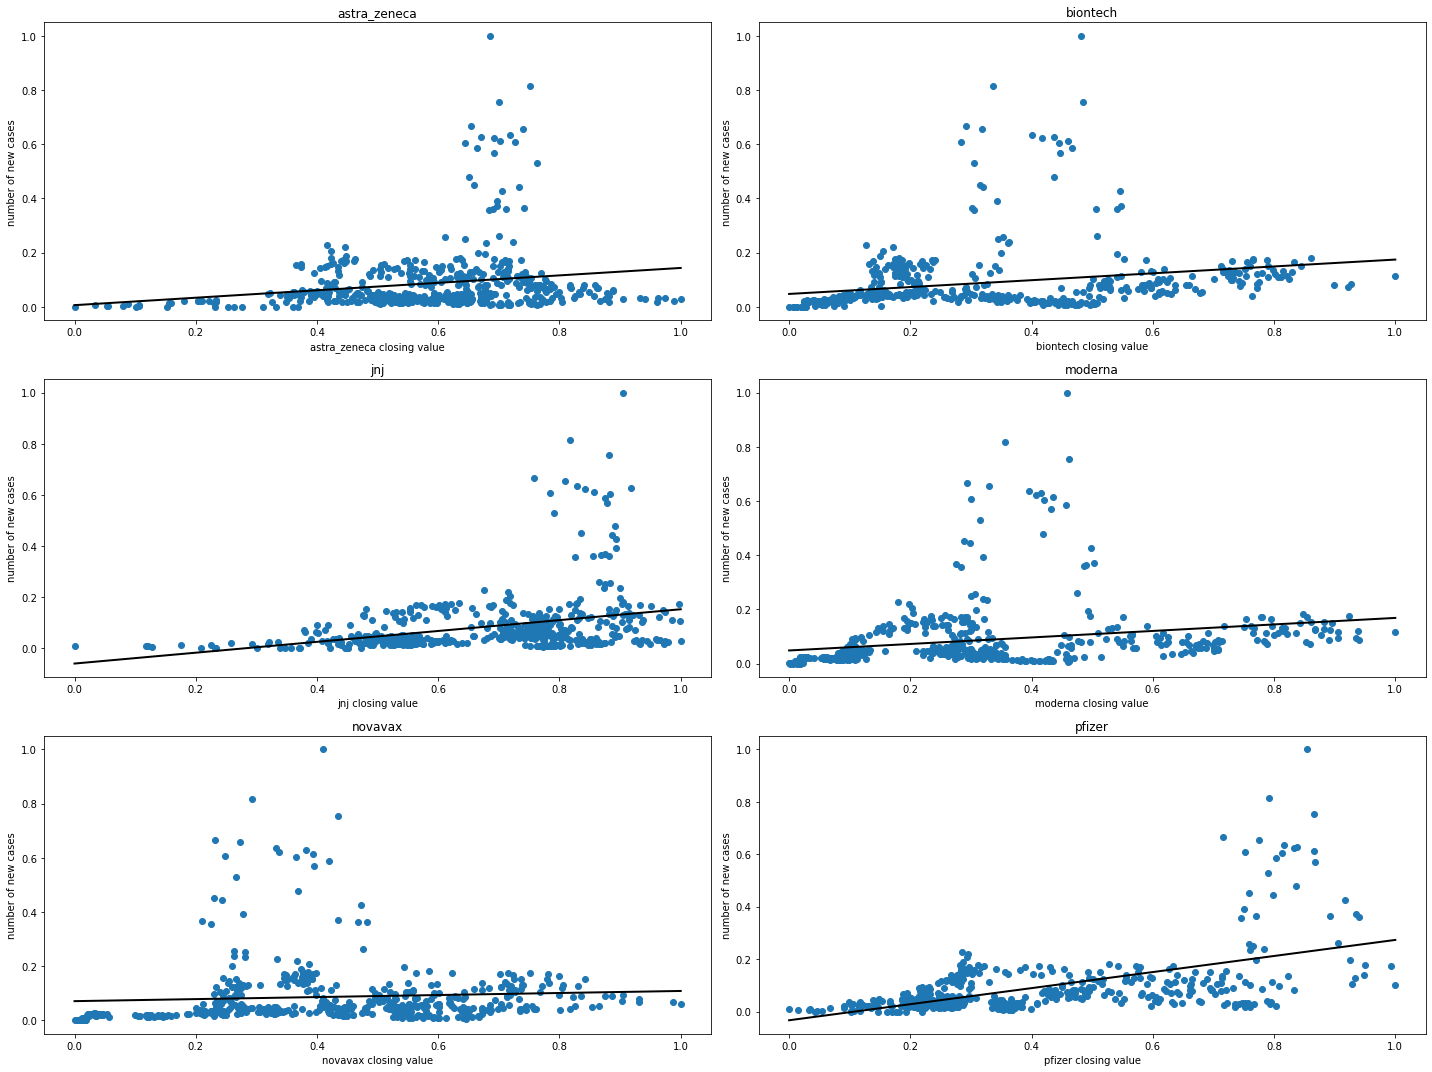

In [8]:
stocks = ['astra_zeneca_close', 'biontech_close', 'jnj_close', 'moderna_close', 'novavax_close', 'pfizer_close']

fig, axes = plt.subplots(3, 2, figsize = (20, 15))

count = 0
x_val = np.linspace(0, 1, num=100)
for i in range(0, 3):
    for j in range(0, 2):
        col_name = stocks[count]
        axes[i][j].scatter(normalized_df[col_name], normalized_df['new_cases']);

        poly = np.poly1d(np.polyfit(normalized_df[col_name], normalized_df['new_cases'], 1))
        axes[i][j].plot(x_val, poly(x_val), color = "k", lw = 2);

        axes[i][j].set_title(col_name[:len(col_name) - 6]);
        axes[i][j].set_xlabel(col_name[:len(col_name) - 6] + ' closing value');
        axes[i][j].set_ylabel('number of new cases');
        count += 1

fig.tight_layout()
plt.show()

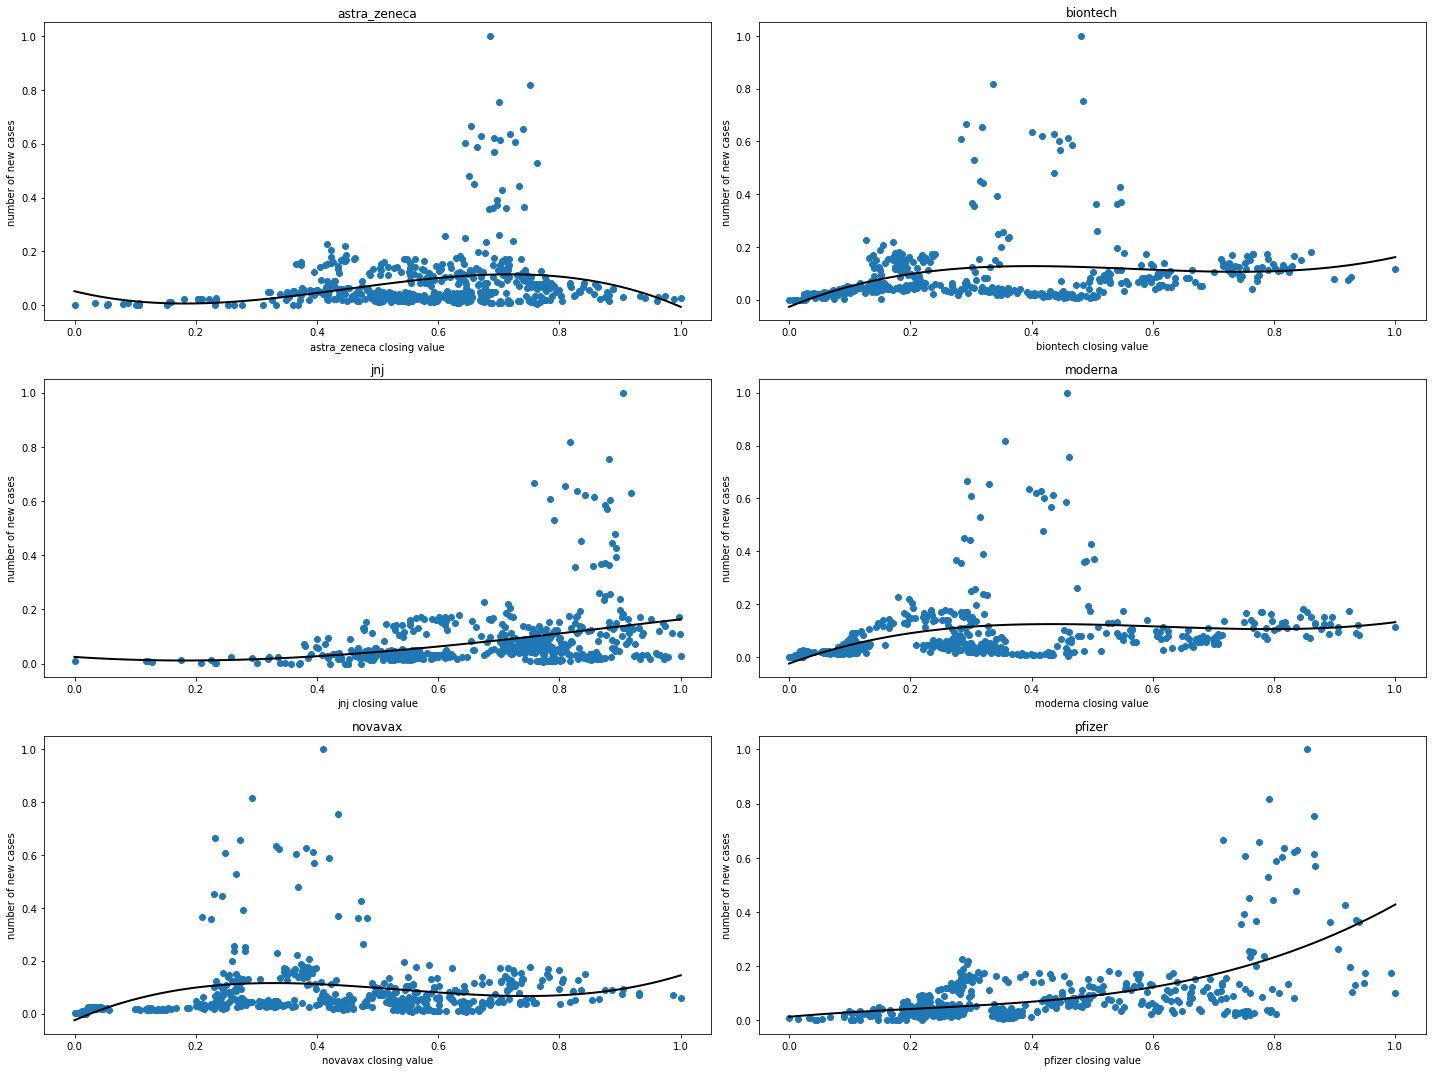

In [9]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))

count = 0
x_val = np.linspace(0, 1, num=100)
for i in range(0, 3):
    for j in range(0, 2):
        col_name = stocks[count]
        axes[i][j].scatter(normalized_df[col_name], normalized_df['new_cases']);

        poly = np.poly1d(np.polyfit(normalized_df[col_name], normalized_df['new_cases'], 3))
        axes[i][j].plot(x_val, poly(x_val), color = "k", lw = 2);

        axes[i][j].set_title(col_name[:len(col_name) - 6]);
        axes[i][j].set_xlabel(col_name[:len(col_name) - 6] + ' closing value');
        axes[i][j].set_ylabel('number of new cases');
        count += 1

fig.tight_layout()
plt.show()

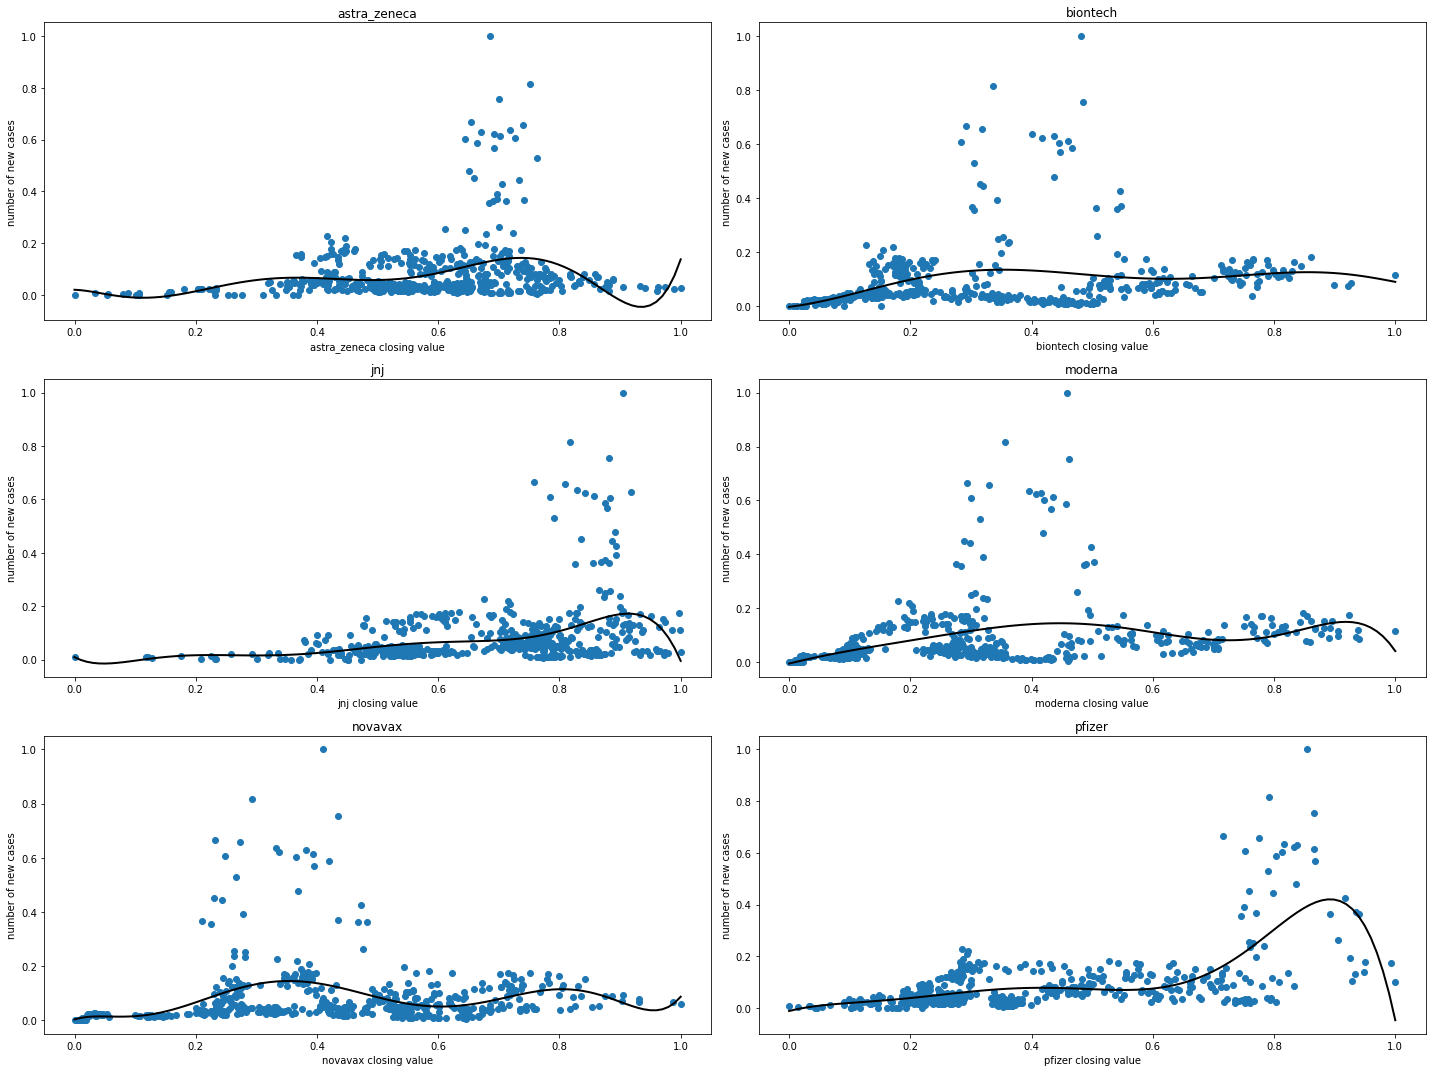

In [10]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))

count = 0
for i in range(0, 3):
    for j in range(0, 2):
        col_name = stocks[count]
        axes[i][j].scatter(normalized_df[col_name], normalized_df['new_cases']);

        poly = np.poly1d(np.polyfit(normalized_df[col_name], normalized_df['new_cases'], 7))
        axes[i][j].plot(x_val, poly(x_val), color = "k", lw = 2);

        axes[i][j].set_title(col_name[:len(col_name) - 6]);
        axes[i][j].set_xlabel(col_name[:len(col_name) - 6] + ' closing value');
        axes[i][j].set_ylabel('number of new cases');
        count += 1

fig.tight_layout()
plt.show()

In [11]:
normalized_df.corr(method = 'kendall')['new_cases'].drop(labels=['new_cases'])

astra_zeneca_close    0.117131
biontech_close        0.359311
jnj_close             0.245793
moderna_close         0.359096
novavax_close         0.246881
pfizer_close          0.374487
Name: new_cases, dtype: float64